## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [ ]:
data.isna().sum()

,0
Species,0
Island,0
Clutch Completion,0
Date Egg,0
Culmen Length (mm),2
Culmen Depth (mm),2
Flipper Length (mm),2
Body Mass (g),2
Sex,10
Delta 15 N (o/oo),14


In [ ]:
data = data.dropna()
data.isna().sum().sum()

np.int64(0)

In [ ]:
data.nunique()

,0
Species,3
Island,3
Clutch Completion,2
Date Egg,50
Culmen Length (mm),159
Culmen Depth (mm),79
Flipper Length (mm),53
Body Mass (g),93
Sex,3
Delta 15 N (o/oo),325


In [ ]:
data.dtypes[data.dtypes == 'object']

,0
Species,object
Island,object
Clutch Completion,object
Sex,object


Species и Island закодируем порядково, так как под ними подразумеваются независимые классовые признаки

Clutch Completion 0 и 1 No и Yes соответственно
Sex аналогично закодируем бинарно, так как всего 2 пола

In [ ]:
data

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,Yes,382,47.6,18.3,195.0,3850.0,FEMALE,8.83502,-24.65859
340,Adelie,Torgersen,Yes,382,39.7,18.4,190.0,3900.0,MALE,9.29808,-25.23453
341,Adelie,Biscoe,Yes,16,38.6,17.2,199.0,3750.0,FEMALE,8.77322,-26.48973
342,Gentoo,Biscoe,Yes,392,46.6,14.2,210.0,4850.0,FEMALE,8.38289,-26.86352


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

peng = data.copy()
clutch_competition = {'No': 0, 'Yes': 1}
sex = {'FEMALE': 0, 'MALE': 1}
species = {'Chinstrap': 0, 'Gentoo': 1, 'Adelie': 2}

peng['Species'] = peng['Species'].map(species)
peng['Island'] = oe.fit_transform(peng[['Island']])
peng['Clutch Completion'] = peng['Clutch Completion'].map(clutch_competition)
peng['Sex'] = peng['Sex'].map(sex)
peng

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,1.0,1,382,50.9,19.1,196.0,3550.0,1.0,10.02372,-24.86594
1,0,1.0,1,741,45.2,17.8,198.0,3950.0,0.0,8.88942,-24.49433
2,1,0.0,1,744,46.5,13.5,210.0,4550.0,0.0,7.99530,-25.32829
3,0,1.0,1,10,45.2,16.6,191.0,3250.0,0.0,9.62357,-24.78984
4,1,0.0,1,13,48.4,14.4,203.0,4625.0,0.0,8.16582,-26.13971
...,...,...,...,...,...,...,...,...,...,...,...
339,0,1.0,1,382,47.6,18.3,195.0,3850.0,0.0,8.83502,-24.65859
340,2,2.0,1,382,39.7,18.4,190.0,3900.0,1.0,9.29808,-25.23453
341,2,0.0,1,16,38.6,17.2,199.0,3750.0,0.0,8.77322,-26.48973
342,1,0.0,1,392,46.6,14.2,210.0,4850.0,0.0,8.38289,-26.86352


Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [ ]:
y = peng['Species']
X = peng.drop(columns='Species')


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [ ]:
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=28, stratify=y)

# stratify важен для сблансированности выборок по целевому признаку, чтобы приблизительно равномерно было разделение общей выборки пингвинов на тестовую и обучающую выборку по группе вида (целевой переменной)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()

X_test_1 = scaler.fit_transform(X_test[['Flipper Length (mm)', 'Body Mass (g)']].values)
X_train_1 = scaler.fit_transform(X_train[['Flipper Length (mm)', 'Body Mass (g)']].values)
models = pd.DataFrame(columns = ['NN', 'Model'])



ans_df = pd.DataFrame(columns = ['NN', 'Train', 'Test'])
neighbour_counts = [1, 3, 5, 10, 15, 25]

for neighbours in neighbour_counts:
  neigh = KNeighborsClassifier(n_neighbors=neighbours)
  neigh.fit(X_train_1, y_train)

  models = pd.concat([models, pd.DataFrame([[neighbours, neigh]], columns=["NN", "Model"])], ignore_index=True)

  y_train_pred = neigh.predict(X_train_1)
  y_test_pred = neigh.predict(X_test_1)

  train_accuracy = np.round(accuracy_score(y_train, y_train_pred), 2)
  test_accuracy = np.round(accuracy_score(y_test, y_test_pred), 2)
  ans_df = pd.concat([ans_df, pd.DataFrame([[neighbours, train_accuracy, test_accuracy]], columns=["NN", "Train", "Test"])], ignore_index=True)

print(ans_df.to_string(index=False))



NN  Train  Test
 1   0.99  0.75
 3   0.86  0.75
 5   0.85  0.77
10   0.83  0.78
15   0.84  0.76
25   0.79  0.78


<ipython-input-13-156a64eaaff3>:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ans_df = pd.concat([ans_df, pd.DataFrame([[neighbours, train_accuracy, test_accuracy]], columns=["NN", "Train", "Test"])], ignore_index=True)


### ПРИМЕР ВЫВОДА ###
NN	Train	Test
1	0.97	0.74
3	0.86	0.76
5	0.83	0.78
10	0.82	0.78
15	0.81	0.76
25	0.79	0.84


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

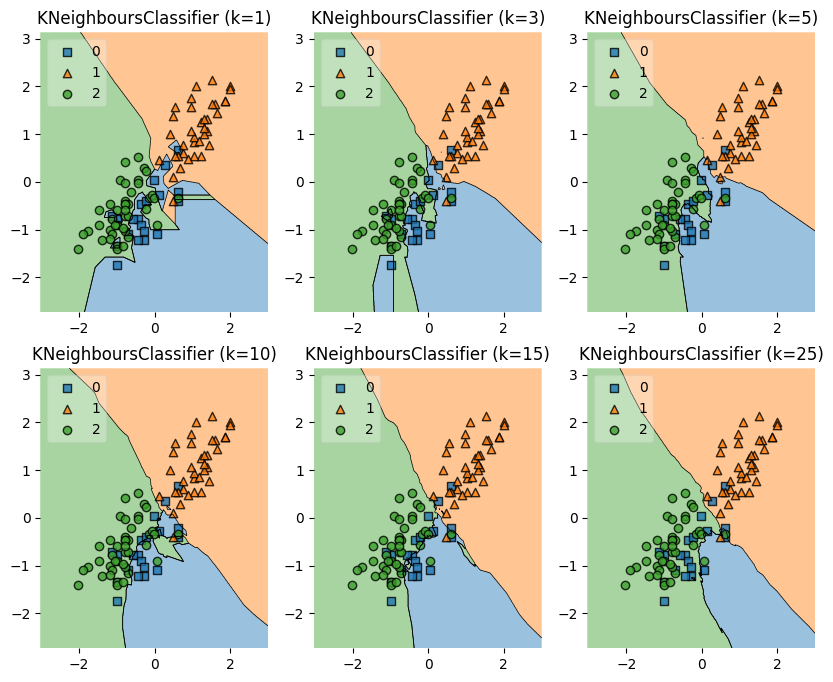

In [ ]:
from mlxtend.plotting import plot_decision_regions
import itertools
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
neighbour_counts = [1, 3, 5, 10, 15, 25]

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(10,8))

labels = ["KNeighboursClassifier (k={})".format(i) for i in neighbour_counts]
for clf, lab, grd in zip(models['Model'],
                         labels,
                         itertools.product([0, 1], [0, 1, 2])):

    clf.fit(X_train_1, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_1, y=y_train.values, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Нетрудно заметить, что наиболее успешно с классификацией справились модели на 5, 10 и 15 ближайших соседей (в зависимости от того, как смотреть на некоторые излишние сглаживания и контрасты), так как графики по возрастающей мере не обращает внимания на исключительный выбросы и на них минимально количество абстрагированных островов групп, в то время как бОльшая часть пингвинов оказалась в своей группе (чего не скажешь например о первых двух графиках, в которых в различной мере модель переобучается). В случае с 25 ближайшими соседями можно заметить, что бОльшая часть пингвинов из синей группы классифицируется в зеленую, что говорит о недообучении модели и излишнем сглаживании.

Тестовая точность максимальна при k=10 и k=25 (обе дают 0.78). При k=5 точность 0.77 — практически не хуже, разница всего 0.01.

Исходя из полученных выводов, можно сделать выбор в пользу модели на 5 или 10 ближайших соседях (в них сбалансировано сглаживание и соотнесение объектов к группам, а также наблюдается наибольшая точность среди всех протестированных моделей)

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

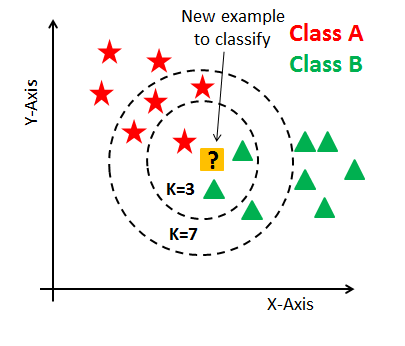

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):

      if not isinstance(k, int) or k <= 0:
        raise ValueError("k должно быть целым положительным числом")

      self.k = k
      self.X = None
      self.y = None

    def fit(self, X, y):

      self.X = X
      self.y = y

      if self.X.shape[0] != self.y.shape[0]:
        raise ValueError("Для каждого элемента X должно быть целевое значение y")

      pass

    def predict(self, X):

      if self.X is None or self.y is None:
        raise ValueError("Модель не обучена. Вызовите fit(X, y)")
      if self.k > self.X.shape[0]:
        raise ValueError("k превышает количество обучающих объектов")
      if X.shape[1] != self.X.shape[1]:
        raise ValueError("Число признаков в X не совпадает с обучающей выборкой")
      if self.k > self.X.shape[0]:
        raise ValueError("k не может быть больше количества обучающих объектов")



      predictions = []
      for x in X:
        distances = []
        for i, test_x in enumerate(self.X):
          dist = self.count_distance(x, test_x)
          distances.append(dist)

        sort_ind = np.argsort(distances, axis=0)
        predict = np.array(self.y)[sort_ind]

        k_near_neighbours = Counter(predict[:self.k])

        predictions.append(max(k_near_neighbours, key=k_near_neighbours.get))

      return np.array(predictions)
      pass

    def count_distance(self, x, y):
      return np.linalg.norm(x-y)
      pass

    def calculate_accuracy(self, X_test, y_test):
      y_pred = self.predict(X_test)
      accuracy = np.mean(y_pred.astype(int) == y_test.astype(int))
      return accuracy
      pass

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [ ]:
knn1 = KNN(k=1)
knn3 = KNN(k=3)
knn5 = KNN(k=5)
knn10 = KNN(k=10)
knn15 = KNN(k=15)
knn25 = KNN(k=25)

neighbour_counts = [1, 3, 5, 10, 15, 25]


# X_train_1
# y_train
# X_test_1
# y_test

# k=1

accuracies = pd.DataFrame(columns = ['NN', 'Accuracy'])

for k in neighbour_counts:
  knn = KNN(k=k)
  knn.fit(X_train_1, y_train)
  acc_knn = np.round(knn.calculate_accuracy(X_test_1, y_test), 2)

  accuracies = pd.concat([accuracies, pd.DataFrame([[k, acc_knn]], columns = ['NN', 'Accuracy'])], ignore_index=True)
  print("Точность KNN с k = {} составляет {}".format(k, acc_knn))

print(accuracies)

<ipython-input-19-e01d671c335f>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  accuracies = pd.concat([accuracies, pd.DataFrame([[k, acc_knn]], columns = ['NN', 'Accuracy'])], ignore_index=True)


Точность KNN с k = 1 составляет 0.75
Точность KNN с k = 3 составляет 0.76
Точность KNN с k = 5 составляет 0.78
Точность KNN с k = 10 составляет 0.78
Точность KNN с k = 15 составляет 0.76
Точность KNN с k = 25 составляет 0.78
   NN  Accuracy
0   1      0.75
1   3      0.76
2   5      0.78
3  10      0.78
4  15      0.76
5  25      0.78


Лучшие accuracy наблюдаются при k=5, 10 и 25 -- 0.78

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
data.isna().sum().sum()

np.int64(0)

В целом можно удалить первый столбец с индексами, так как индексация уже имеется

In [ ]:
data = data.drop(columns='Unnamed: 0')
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [ ]:
corr_map = data.corr(numeric_only = True)
corr_map

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

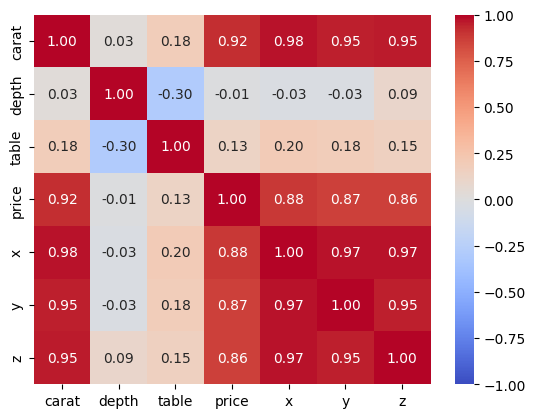

In [ ]:
import seaborn as sns

sns.heatmap(corr_map,vmin=-1, vmax=1, center= 0, cmap = 'coolwarm',annot=True, fmt=".2f")

Нетрудно заметить, что у стоимости бриллианта наблюдается достаточно сильная положительная корреляция с весом бриллианта в каратах, а также с его характеристиками объема (длина, ширина, высота). В то же время, практически отсутствует связь с такими вещественными признаками, как общая глубина в процентах и ширина столешницы ромба относительно самой широкой точки.

Стоит отметить, что форма в данном случае никаким образом не влияет на ценообразование бриллиантов, в то время как отдельно взятые характеристики, через готорые эта форма выражается в общей глубине в процентах значительно сказываются в цене по мере их увеличения декомпозированно. То есть, на цену больше влияет размер, чем форма бриллианта.
То же самое можно сказать и про признак table, который по сути тоже описывает форму бриллианта (это ширина грани бриллианта, выраженная в процентах от его среднего диаметра)

**Вывод:** Цена бриллианта зависит от размера и веса, в то время как форма не имеет значения


**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [ ]:
diamonds = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], prefix=['cut', 'color', 'clarity'], dtype='int')

diamonds

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
from sklearn.model_selection import train_test_split

X = diamonds.drop('price', axis=1)
y = diamonds['price']

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=28)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric = ['carat', 'depth', 'table', 'x', 'y', 'z']

X_test[numeric] = scaler.fit_transform(X_test[numeric])
X_train[numeric] = scaler.fit_transform(X_train[numeric])

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
50668,-1.030358,-1.493075,-0.205529,-1.188096,-1.139258,-1.280889,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
47902,-0.440668,-1.075966,-0.205529,-0.226366,-0.259359,-0.352513,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1168,0.001599,-1.632111,0.241917,0.299024,0.306912,0.097608,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
30321,-0.925056,0.383915,-0.205529,-1.081237,-1.017292,-0.999563,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
47916,-0.503849,-0.033194,-0.652975,-0.386654,-0.355190,-0.366580,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40195,-0.482789,0.175360,-0.205529,-0.386654,-0.337766,-0.338447,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7200,0.422806,-1.215003,2.031702,0.664125,0.620539,0.477399,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
26117,2.549902,1.982832,-1.100422,1.884098,1.953455,2.207554,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4089,0.212203,0.870542,0.241917,0.343549,0.367895,0.463332,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred_test = lin_reg.predict(X_test)
y_pred_train = lin_reg.predict(X_train)


mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

r2_test = lin_reg.score(X_test, y_test)
r2_train = lin_reg.score(X_train, y_train)

ans = pd.DataFrame({'Sample': ['test', 'train'], 'MSE': [mse_test, mse_train], 'R2': [r2_test, r2_train]})
print(ans)

  Sample           MSE        R2
0   test  1.301690e+06  0.918665
1  train  1.236975e+06  0.921249


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

<ipython-input-68-16d1d340677b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefs[coefs['Признак'].isin(numeric)], x='Коэффициент', y='Признак', palette='coolwarm')


<Axes: xlabel='Коэффициент', ylabel='Признак'>

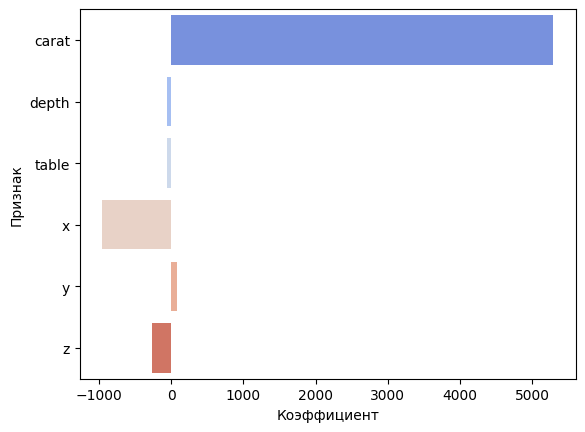

In [ ]:
coefs = pd.DataFrame({'Признак': X_train.columns, 'Коэффициент':lin_reg.coef_})
coefs
sns.barplot(data=coefs[coefs['Признак'].isin(numeric)], x='Коэффициент', y='Признак', palette='coolwarm')

На графике нетрудно заметить, что наибольшим по модулю коэффициентом, выделяющимся среди остальных, обладает признак carat (вес бриллианта в каратах)

**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn import linear_model
clf_lasso = linear_model.Lasso(alpha=10)
clf_ridge = linear_model.Ridge(alpha=10)

clf_lasso.fit(X_train, y_train)
clf_ridge.fit(X_train, y_train)

y_pred_lasso = clf_lasso.predict(X_test)
y_pred_ridge = clf_ridge.predict(X_test)

coefs['Коэффициент LASSO'] = clf_lasso.coef_
coefs['Коэффициент Ridge'] = clf_ridge.coef_
coefs

,Признак,Коэффициент,Коэффициент LASSO,Коэффициент Ridge
0,carat,5292.167383,4843.898124,5207.971858
1,depth,-59.258441,-77.772037,-54.644628
2,table,-58.280108,-75.362538,-58.663680
3,x,-953.246063,-522.696512,-845.456795
4,y,75.297327,-0.000000,66.476870
5,z,-262.609651,-243.812796,-285.983937
6,cut_Fair,-580.871798,-434.067639,-588.441567
7,cut_Good,-38.545380,-74.611607,-37.544928
8,cut_Ideal,275.377424,105.366033,278.043668
9,cut_Premium,208.991517,5.341890,209.158902


<ipython-input-73-f332eb8d26ed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefs[coefs['Признак'].isin(numeric)], x='Коэффициент', y='Признак', palette='coolwarm', ax = axs[0])
<ipython-input-73-f332eb8d26ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefs[coefs['Признак'].isin(numeric)], x='Коэффициент LASSO', y='Признак', palette='coolwarm', ax = axs[1])
<ipython-input-73-f332eb8d26ed>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefs[coefs['Признак'].isin(numeric)], x='Коэффициент Ridge', y='Признак', pale

<Axes: xlabel='Коэффициент Ridge', ylabel='Признак'>

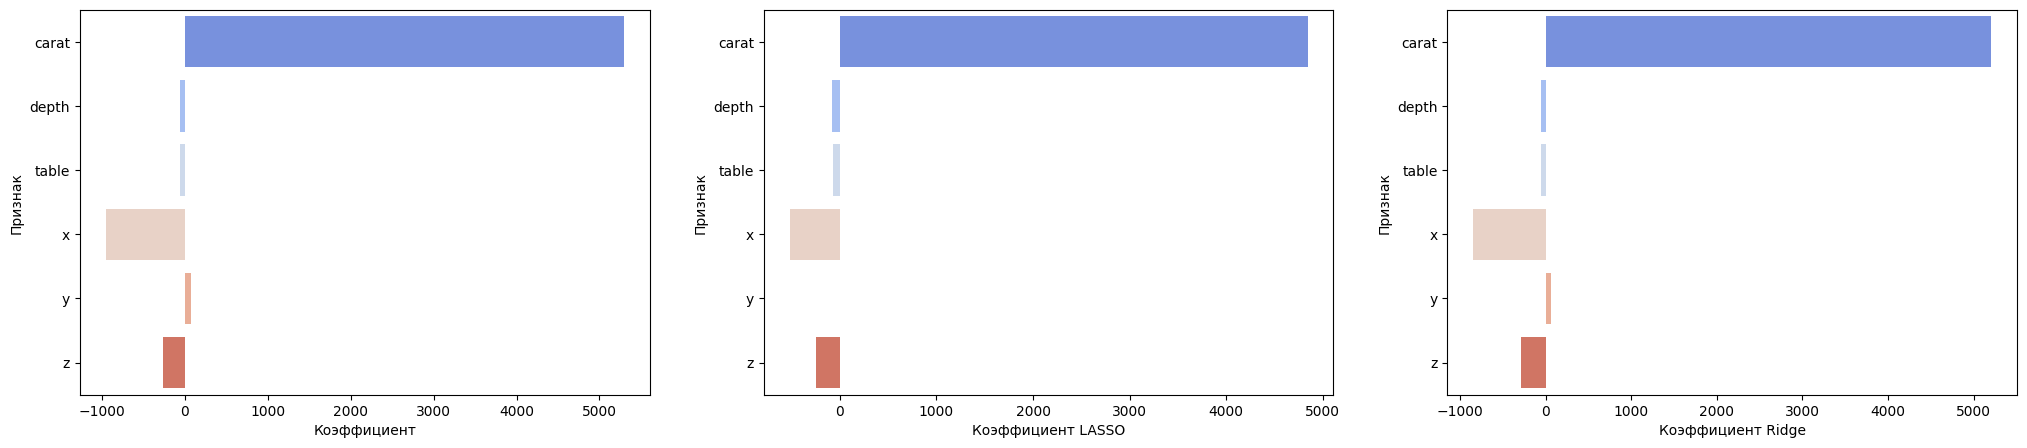

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (25, 5))
sns.barplot(data=coefs[coefs['Признак'].isin(numeric)], x='Коэффициент', y='Признак', palette='coolwarm', ax = axs[0])
sns.barplot(data=coefs[coefs['Признак'].isin(numeric)], x='Коэффициент LASSO', y='Признак', palette='coolwarm', ax = axs[1])
sns.barplot(data=coefs[coefs['Признак'].isin(numeric)], x='Коэффициент Ridge', y='Признак', palette='coolwarm', ax = axs[2])

<ipython-input-74-34e4deef16f7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefs, x='Коэффициент', y='Признак', palette='coolwarm', ax = axs[0])
<ipython-input-74-34e4deef16f7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefs, x='Коэффициент LASSO', y='Признак', palette='coolwarm', ax = axs[1])
<ipython-input-74-34e4deef16f7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefs, x='Коэффициент Ridge', y='Признак', palette='coolwarm', ax = axs[2])


<Axes: xlabel='Коэффициент Ridge', ylabel='Признак'>

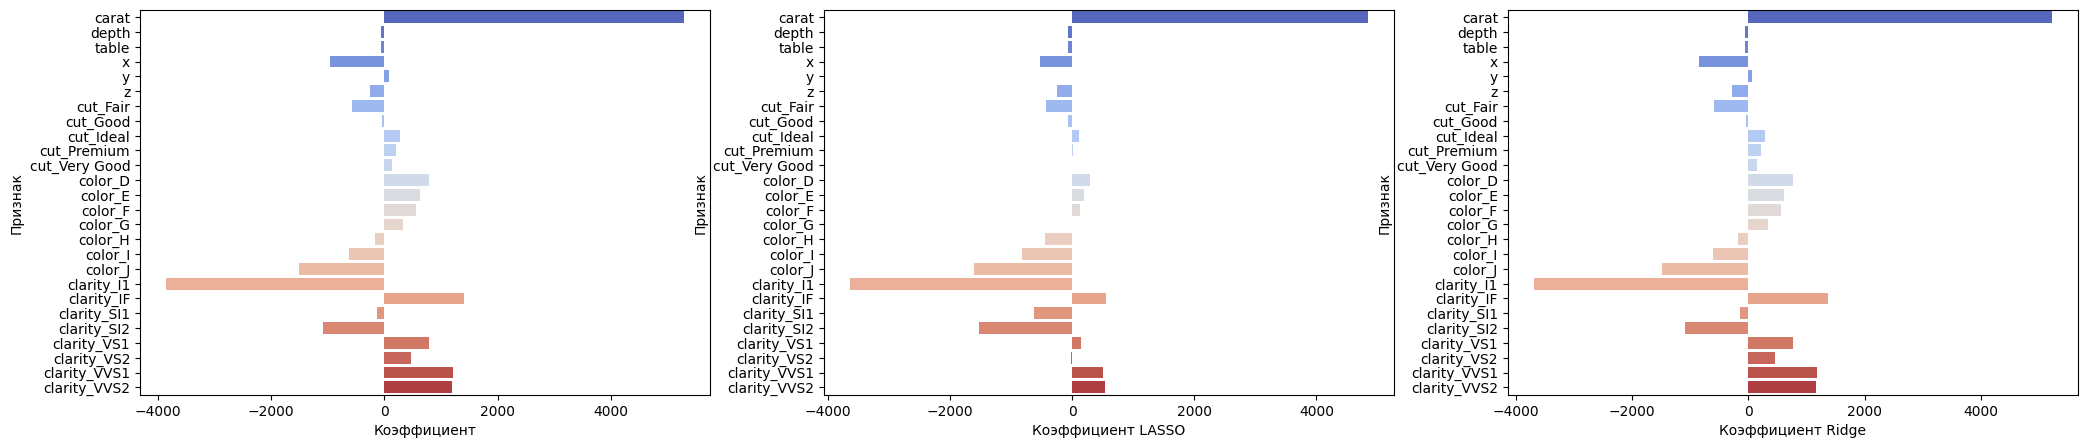

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (25, 5))
sns.barplot(data=coefs, x='Коэффициент', y='Признак', palette='coolwarm', ax = axs[0])
sns.barplot(data=coefs, x='Коэффициент LASSO', y='Признак', palette='coolwarm', ax = axs[1])
sns.barplot(data=coefs, x='Коэффициент Ridge', y='Признак', palette='coolwarm', ax = axs[2])

При сравнении получившихся коэффициентов с коэффичиентами в исходой модели, можно сделать вывод о том, что глобальных изменений в весах не произошло. Видно, что в LASSO регуляризации зануляется вес признака 'y'. Ridge уменьшил коэффициенты, но не занулил их, значит, признаки были коррелированы, но всё же полезны для модели. Проблема мультиколлинеарности была, но не критична
Из невещественных признаков видно, что Lasso занулило признаки cut_Very_Good, color_G.

Выводы: Зануленные веса признаков y, cut_Very_Good, color_G говорят об их сиольной корреляции с другими переменными и есть смысл в том, чтобы исключить их из модели для упрощения.

В то же время Ridge регуляризация незначительнот снизила коэффициенты, что говорит не сильной критичности и выраженности проблемы мультиколлинеарности в анной модели.

**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [ ]:
a = [[3, 4, 5], [1, 6, 7], [12, 88, 18]]

norms = pd.Series()
for i in range(10):
  norms.append(i)

AttributeError: 'Series' object has no attribute 'append'

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.097e+07, tolerance: 2.542e+07
  model = cd_fast.enet_coordinate_descent(


([<matplotlib.axis.XTick at 0x7e564d07b290>,
 [Text(0.1, 0, '0.1'),
  Text(1.0, 0, '1.0'),
  Text(10.0, 0, '10.0'),
  Text(100.0, 0, '100.0'),
  Text(200.0, 0, '200.0')])

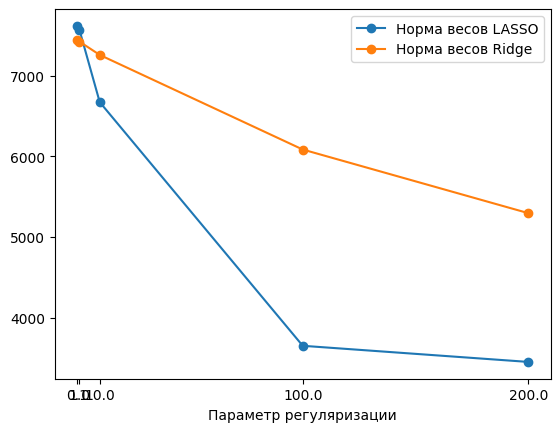

In [ ]:
from sklearn import linear_model

alpha = [0.1, 1, 10, 100, 200]
norms_lasso = []
norms_ridge = []
for i in alpha:
  clf_lasso = linear_model.Lasso(alpha=i)
  clf_ridge = linear_model.Ridge(alpha=i)

  clf_lasso.fit(X_train, y_train)
  clf_ridge.fit(X_train, y_train)

  coeff_lasso = clf_lasso.coef_
  coeff_ridge = clf_ridge.coef_

  norms_lasso.append(np.linalg.norm(coeff_lasso))
  norms_ridge.append(np.linalg.norm(coeff_ridge))

coeff_norm = pd.DataFrame({'Параметр регуляризации': alpha, 'Норма весов LASSO': norms_lasso, 'Норма весов Ridge': norms_ridge})
coeff_norm.plot(x = 'Параметр регуляризации', marker ='o')

plt.xticks(coeff_norm['Параметр регуляризации'])

Нетрудно заметить, что регуляризация LASSO значительно сильнее снижает веса с превышением параметром регуляризации значения 1. LASSO регрессия сильнее снижает норму коэффициентов и делает это не просто уменьшением значений, а занулением некоторых коэффициентов, что говорит о большей эффективности регуляризации и решения проблемы мультиколинеарности по сравнению с Ridge регрессией

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [ ]:
from sklearn.linear_model import LassoCV

reg = LassoCV(alphas = alpha, cv=5, random_state=0).fit(X_train, y_train)
mse_cv = reg.mse_path_
mse_cv = mse_cv.mean(axis = 1)

mse_ans = pd.DataFrame({'Alpha': reg.alphas_, 'MSE_mean': mse_cv})
mse_ans.sort_values('MSE_mean').head(1)['Alpha'] #выводим alpha с наименьшим значением средней MSE на кроссвалидации

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1155476316.9823875, tolerance: 20198335.570317082
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5169678586.727321, tolerance: 20198335.570317082
  model = cd_fast.enet_coordinate_descent_gram(


,Alpha
2,10.0


Наиболее оптимальный коэффициент регуляризации alpha = 10

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
clf_lasso = linear_model.Lasso(alpha=10)
clf_lasso.fit(X_train, y_train)
coefs = pd.DataFrame({'Sign': X_train.columns, 'Coef': clf_lasso.coef_})
coefs

,Sign,Coef
0,carat,4843.898124
1,depth,-77.772037
2,table,-75.362538
3,x,-522.696512
4,y,-0.000000
5,z,-243.812796
6,cut_Fair,-434.067639
7,cut_Good,-74.611607
8,cut_Ideal,105.366033
9,cut_Premium,5.341890


<ipython-input-96-f850225a2fc9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefs, x='Coef', y='Sign', palette='coolwarm')


<Axes: xlabel='Coef', ylabel='Sign'>

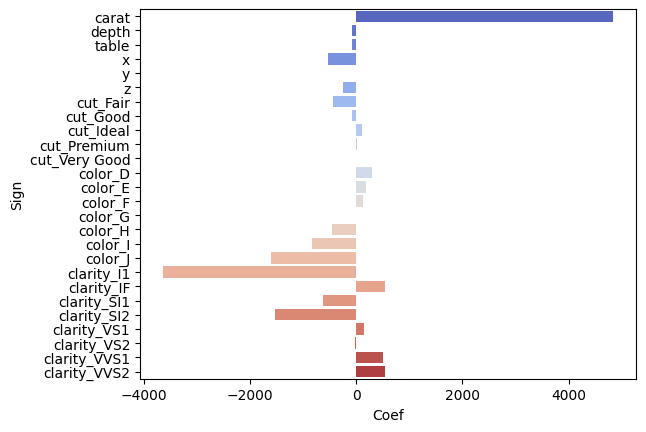

In [ ]:
sns.barplot(data=coefs, x='Coef', y='Sign', palette='coolwarm')

Здесь как наиболее важные признаки можно выделить carat, clarify_I1 - они больше всех выделяются среди остальных по модулю, что вполне объяснимо: clarify_I1, будучи наиболее низкой чистотой бриллианта, сильно отрицательно сказывается на целевой переменной (чене бриллианта), в то же время вес бриллианта, наоборот, значительно сильнее всех остальных признаков увеличивает целевую переменную price. В то же время остаются немаловажными такие признаки, как color_J, clarify_SI2, color_I.

Также, как можно заметить, clarify_VVS1, clarify_VVS2 и Clarify_IF тоже положительно влияют на целевую переменную, что вполне объяснимо тем, что это три наиболее высоких чистоты бриллианта в градации данного признака. В то же время clarify_SI2 и clarify_SI1 отрицательно сказываются на целевой переменной.



**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred_lasso = clf_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

mse_comparison = pd.DataFrame({'Model':['Standart_Lin_Reg', 'LASSO_Lin_Reg'], 'MSE': [mse_test, mse_lasso]})
mse_comparison

,Model,MSE
0,Standart_Lin_Reg,1.301690e+06
1,LASSO_Lin_Reg,1.340224e+06


В связи с тем, что раннее был сделан вывод о том, что проблема мультиколинеарности в данной модели выражена неявно, можно сделать вывод о том, почему среднеквадратичная ошибка у обычной линейной регрессии немного ниже, чем у LASSO регрессии: Lasso занулило некоторые признаки, что могло повлиять на точность, так как эти признаки могли бы все таки иметь значимость в предсказании (но так как ухудшение точности по сравнению с обычной линейной регрессией небольшое, то это некритично).


В данном случае обычная линейная регрессия оказалось более точной, однако если нужно минимизировать малозначительные признаки и их много, то было бы уместнее использовать LASSO. В случае с бриллиантами LASSO обнуляет не так много весов, при этом уменьшая точность прогнозирования, + здесь некритична проблема мультиколлинеарности. Поэтому лучше использовать обычную линейную регрессию без регуляризации.